<a href="https://colab.research.google.com/github/Dhar9292/CODSOFT_PROJECT/blob/main/codsoftIntern_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data from csv file

In [15]:
import pandas as pd
#Load the data from a csv file
data = pd.read_csv('sales_data.csv')
#Convert the timestamp column tyo datatime type
data['timestamp'] = pd.to_datetime(data['timestamp'])

Prepare the data

In [16]:
#Rename the columns to 'ds' and 'y'
data = data.rename(columns={'timestamp':'ds', 'sales':'y'})

Creating and training the model: Initialize a prophet model and fit it to the data

In [17]:
# pip install prophet
from prophet import Prophet
# creating the prophet model object
model = Prophet()
# fitting the data
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprlhrzc4t/pu2jg8ch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprlhrzc4t/yu17ncos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41917', 'data', 'file=/tmp/tmprlhrzc4t/pu2jg8ch.json', 'init=/tmp/tmprlhrzc4t/yu17ncos.json', 'output', 'file=/tmp/tmprlhrzc4t/prophet_modelokqnwe0a/prophet_model-20230811064700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:47:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Generate future dates for the next 2 years

In [18]:
future_dates = model.make_future_dataframe(periods=365*2, freq='D')

Make predictions

In [19]:
forecast = model.predict(future_dates)

Visualize the results.

<Figure size 640x480 with 0 Axes>

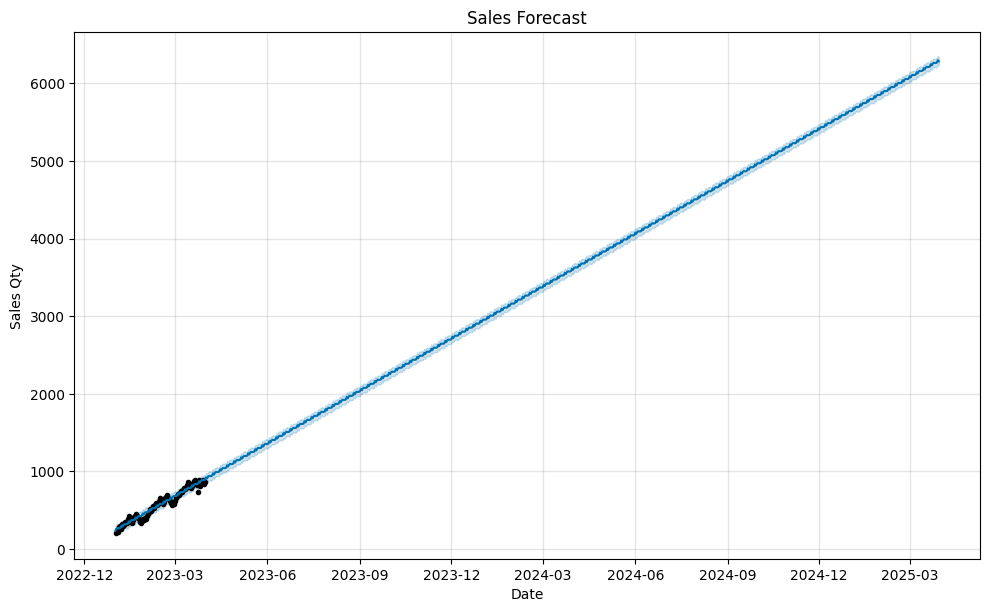

In [20]:
# Plot the forecasted sales
import matplotlib.pyplot as plt
plt.figure()
model.plot(forecast, xlabel='Date', ylabel='Sales Qty')
plt.title('Sales Forecast')
plt.show()

Plot the historical data

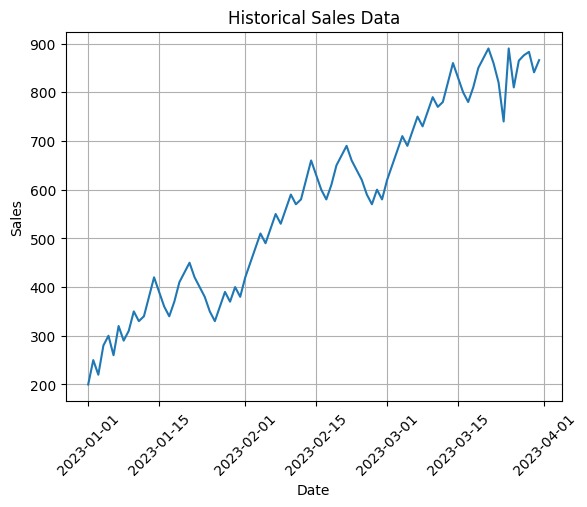

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('sales_data.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
plt.plot(data['timestamp'], data['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical Sales Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()